# MNIST KAGGLE With Basic Tensorflow

## Libraries and Settings

In [48]:
import numpy as np
import pandas as pd

## Data Preparation

In [70]:
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

In [71]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [73]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [74]:
class Dataset(object):
    def __init__(self, data):
        self.rows = len(data.values)
        self.images = data.iloc[:,1:].values
        self.images = self.images.astype(np.float32)
        self.images = np.multiply(self.images, 1.0 / 255.0)
        self.labels = np.array([np.array([int(i == l) for i in range(10)]) for l in data.iloc[:,0].values]) #one-hot
        self.index_in_epoch = 0
        self.epoch = 0
    def next_batch(self, batch_size):
        start = self.index_in_epoch
        self.index_in_epoch += batch_size
        if self.index_in_epoch > self.rows:
            self.epoch += 1
            perm = np.arange(self.rows)
            np.random.shuffle(perm)
            self.images = self.images[perm]
            self.labels = self.labels[perm]
            #next epoch
            start = 0
            self.index_in_epoch = batch_size
        end = self.index_in_epoch
        return self.images[start:end] , self.labels[start:end]

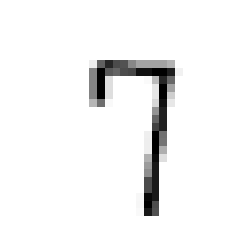

In [75]:
#look at one image
some_digit = train.iloc[50,1:] # 50th element
some_digit_image = some_digit.values.reshape(28,28) # reshape to square
plt.imshow(some_digit_image, cmap = plt.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

### 1-layer neural network the neural network structure is

* Input Layer
* output layer
* softmax the outcome

In [76]:
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [77]:
train_data = Dataset(train.iloc[0:37000])
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = train_data.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [78]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

validate_data = Dataset(train.iloc[37000:])
print(sess.run(accuracy, feed_dict={x: validate_data.images, y_: validate_data.labels}))


0.916


In [79]:
test_images = test.values.astype(np.float32)
test_images = np.multiply(test_images, 1.0 / 255.0)

predictions = sess.run(y, feed_dict={x:test_images})
predictions = [np.argmax(p) for p in predictions]

result = pd.DataFrame({'ImageId': range(1,len(predictions)+1), 'Label': predictions})
result.to_csv('result.csv', index=False, encoding='utf-8')